Dataset shape: (10000, 14)
Results with MKL:
  Training time: 0.265326 seconds
  Accuracy: 79.62%
  Predictions: [0 0 0 ... 0 0 0]


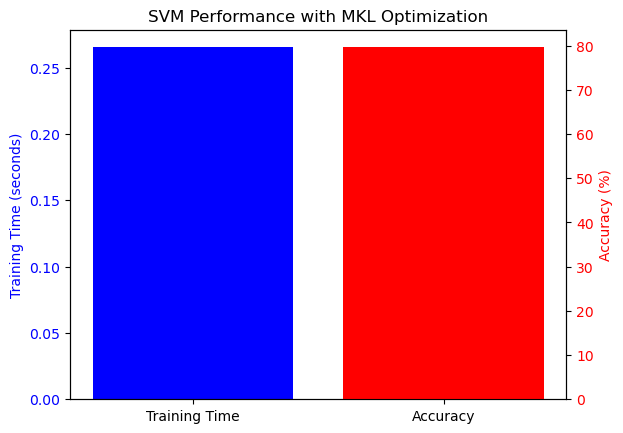

In [3]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import timeit
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /bank_customer.csv')

# Separate features and labels
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

# Convert categorical features to numerical values
# Apply Label Encoding for the target variable if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Print the shape of the dataset
print(f'Dataset shape: {X.shape}')

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Define the SVM classifier
clf = svm.SVC(kernel='linear')

# Measure training time and accuracy
def measure_performance(clf, X_train, y_train, X_test, y_test):
    # Training
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    training_time = timeit.default_timer() - start_time

    # Prediction
    y_pred = clf.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return training_time, accuracy, y_pred

# Measure performance with MKL (scikit-learn should use MKL if properly installed)
train_time_with_mkl, accuracy_with_mkl, y_pred_with_mkl = measure_performance(clf, X_train, y_train, X_test, y_test)

# Print results
print("Results with MKL:")
print(f"  Training time: {train_time_with_mkl:.6f} seconds")
print(f"  Accuracy: {accuracy_with_mkl * 100:.2f}%")
print(f"  Predictions: {y_pred_with_mkl}")

# Plot results
labels = ['Training Time', 'Accuracy']
times = [train_time_with_mkl]
accuracies = [accuracy_with_mkl * 100]

fig, ax1 = plt.subplots()

# Bar chart for training time
ax1.bar(labels[0], times[0], label='Training Time (seconds)', color='b')
ax1.set_ylabel('Training Time (seconds)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Bar chart for accuracy
ax2 = ax1.twinx()
ax2.bar(labels[1], accuracies[0], label='Accuracy (%)', color='r')
ax2.set_ylabel('Accuracy (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('SVM Performance with MKL Optimization')
plt.show()


Dataset shape: (10000, 26935)
Results with MKL:
  Training time: 467.559867 seconds
  Prediction time: 306.766620 seconds
  Accuracy: 79.70%
  Predictions: [0 0 0 ... 0 0 0]


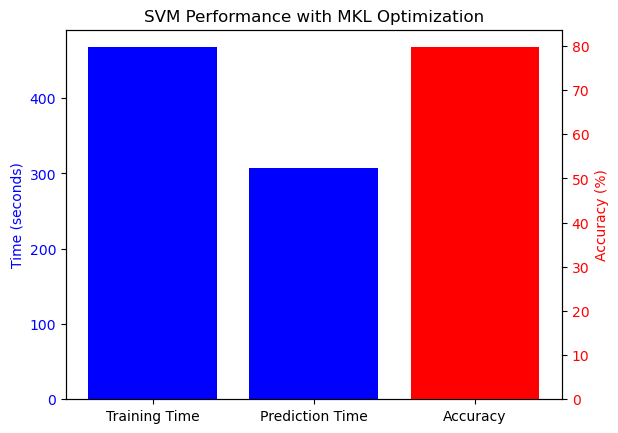

In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import timeit
import matplotlib.pyplot as plt


data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /bank_customer.csv')


X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values  


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X = pd.get_dummies(pd.DataFrame(X)).values

scaler = StandardScaler()
X = scaler.fit_transform(X)


print(f'Dataset shape: {X.shape}')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


clf = svm.SVC(kernel='linear')


def measure_performance(clf, X_train, y_train, X_test, y_test):
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    training_time = timeit.default_timer() - start_time

   
    start_time = timeit.default_timer()
    y_pred = clf.predict(X_test)
    prediction_time = timeit.default_timer() - start_time

  
    accuracy = accuracy_score(y_test, y_pred)

    return training_time, prediction_time, accuracy, y_pred


train_time_with_mkl, predict_time_with_mkl, accuracy_with_mkl, y_pred_with_mkl = measure_performance(clf, X_train, y_train, X_test, y_test)


print("Results with MKL:")
print(f"  Training time: {train_time_with_mkl:.6f} seconds")
print(f"  Prediction time: {predict_time_with_mkl:.6f} seconds")
print(f"  Accuracy: {accuracy_with_mkl * 100:.2f}%")
print(f"  Predictions: {y_pred_with_mkl}")


labels = ['Training Time', 'Prediction Time', 'Accuracy']
times = [train_time_with_mkl, predict_time_with_mkl]
accuracies = [accuracy_with_mkl * 100]

fig, ax1 = plt.subplots()


ax1.bar(labels[:2], times, label='Time (seconds)', color='b')
ax1.set_ylabel('Time (seconds)', color='b')
ax1.tick_params(axis='y', labelcolor='b')


ax2 = ax1.twinx()
ax2.bar(labels[2], accuracies[0], label='Accuracy (%)', color='r')
ax2.set_ylabel('Accuracy (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('SVM Performance with MKL Optimization')
plt.show()
